# Linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [119]:
#Loading the boston housing data and Converting to Data Frame using Pandas

from sklearn.datasets import load_boston

boston = load_boston()
bos = pd.DataFrame(boston.data)

In [120]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [86]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [87]:
#Assigning feature-names to colums of data frame

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [88]:
print (boston.target.shape)

(506,)


In [89]:
#Adding the target column 'Price' to the data frame

bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

In [90]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between RM and Price')

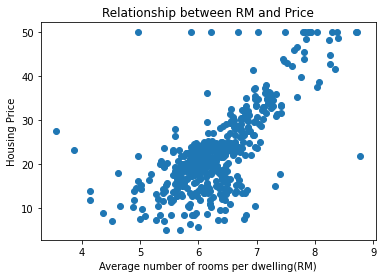

In [91]:
#Relationship between RM and Price

plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

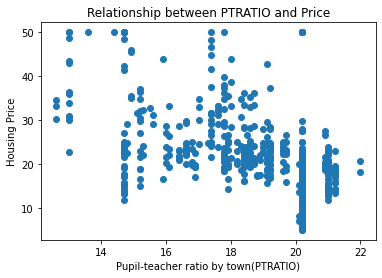

In [92]:
#Relationship between PTRATIO and Price

plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-teacher ratio by town(PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")


Text(0.5, 1.0, 'Relationship between CRIM and Price')

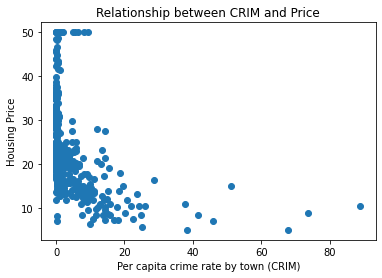

In [93]:
#Relationship between CRIM and Price

plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

Text(0.5, 1.0, 'Relationship between ZN and Price')

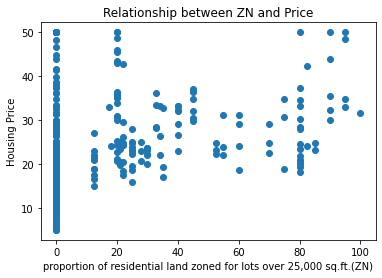

In [94]:
#Relationship between ZN and Price

plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft.(ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")



Text(0.5, 1.0, 'Relationship between INDUS and Price')

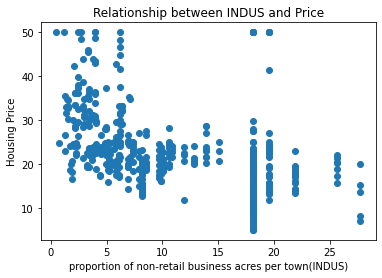

In [95]:
#Relationship between INDUS and Price

plt.scatter(bos.INDUS, bos.PRICE)
plt.xlabel("proportion of non-retail business acres per town(INDUS)")
plt.ylabel("Housing Price")
plt.title("Relationship between INDUS and Price")

Text(0.5, 1.0, 'Relationship between NOX and Price')

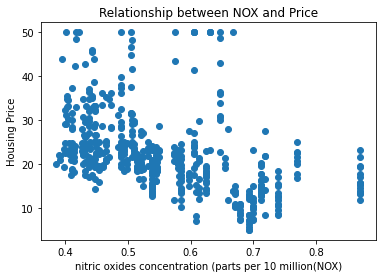

In [96]:
#Relationship between NOX and Price

plt.scatter(bos.NOX, bos.PRICE)
plt.xlabel("nitric oxides concentration (parts per 10 million(NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price")

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

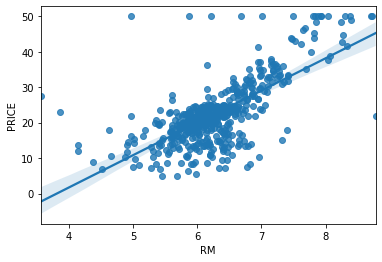

In [97]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

# Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

#Droping the price column 
X = bos.drop('PRICE', axis = 1)

In [99]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
# Now let's split the data into a training set and a testing set. 
# We will train out model on the training set and then use the test set to evaluate the model.

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)

print (Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [101]:
X_train.shape

(339, 13)

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [104]:
X=bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [105]:
y=bos['PRICE']

In [106]:
# Trainning Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

In [107]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [108]:
#Calculating the best fit line
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#Let's evaluate the model by checking out it's intercept and coefficients.

#Various coefficient values in the price prediction
coeff=pd.DataFrame(lm.coef_,boston.feature_names,columns=['Coefficient'])
coeff

,Coefficient
CRIM,-0.112651
ZN,0.052064
INDUS,-0.008500
CHAS,3.098743
NOX,-20.175278
RM,3.618322
AGE,-0.004557
DIS,-1.791801
RAD,0.306929
TAX,-0.012138


In [110]:
print(lm.intercept_)

37.59626243599366


# Predictions made from Model

In [111]:
predictions= lm.predict(X_test)

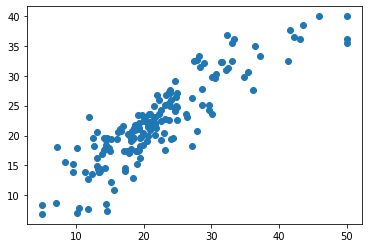

In [112]:
plt.scatter(y_test,predictions)

C:\Users\Jaideep Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

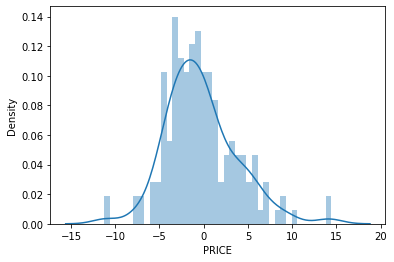

In [113]:
sns.distplot((y_test-predictions),bins=40)

# Regression evaluation metrics

In [114]:
from sklearn import metrics

In [115]:
print('Mean Absolute Error: ' , metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared error' , metrics.mean_squared_error(y_test,predictions))
print('Root Mean quared Error: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error:  3.105567253288012
Mean Squared error 16.335981185041835
Root Mean quared Error:  4.041779457744056


In [116]:
predictions

array([20.84263668, 23.65458239, 17.71884041, 14.43603601, 24.83371263,
       14.13932273, 31.45020702, 18.25038636, 13.84906409, 19.38764936,
       32.65588599, 17.47718902, 22.35895407, 13.90256972, 22.15088817,
       24.89493333, 30.9519563 , 23.04976135, 21.77788532, 25.36792733,
       19.47878194, 23.60811656, 21.01672711, 25.86386357, 19.40502192,
       25.93755217, 37.62211153, 24.12653302, 12.83759622, 33.33931805,
       36.52930234, 27.60670975, 17.60451412,  7.9021346 , 35.55403776,
       35.40608981, 17.65547776, 17.35406744, 20.43396004, 21.79103378,
       31.28561246, 23.63802877, 26.78212796, 16.18194114, 27.09682448,
       24.92651086, 22.34883335, 19.23041535, 14.57993649, 30.63529849,
       22.63475395, 23.51460926, 25.13593394, 19.84559412, 29.11097365,
       32.38278142, 36.10471929, 17.59885043, 17.40252409, 21.44632353,
       32.37659993, 14.44606434, 17.82890362, 13.92594988, 36.20999634,
       19.61860325, 23.66079676, 24.93279377, 32.13563394, 21.56